### Module imports

In [390]:
import pandas as pd
import numpy as np
import re
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

### data Reading

In [391]:
df = pd.read_csv('/content/Data Collection for ML mini project (Responses) - Form Responses 1.csv')

### Understanding Data|

In [392]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 73 columns):
 #   Column                                                                                                                                  Non-Null Count  Dtype 
---  ------                                                                                                                                  --------------  ----- 
 0   Timestamp                                                                                                                               111 non-null    object
 1   Age                                                                                                                                     111 non-null    object
 2   Height
Range should be between 120 cm - 220 cm
Note(Provide the height in integer for eg-124cm ,
           don't provide like 120.64)  111 non-null    object
 3   Weight
Range should be between 30 - 150 kg                            

In [393]:
cols = df.columns.tolist()

for col in cols:
    print(col)


Timestamp
Age
Height
Range should be between 120 cm - 220 cm
Note(Provide the height in integer for eg-124cm ,
           don't provide like 120.64)
Weight
Range should be between 30 - 150 kg
Cuisine_top1
Cuisine_top2
Cuisine_top3
Spice Tolerance
Dietary Preference
Eating Out Per week
Food Budget per meal Note: Provide integer value for eg like-199
Sweet tooth level (1 is low and 5 is high)
Tea vs Coffee
Movie_genre_top1
  Movie_genre_top2  
  Movie_genre_top3 
  Series_genre_top1  
  Series_genre_top2  
  Series_genre_top3  
  Content_lang_top1  
  Content_lang_top2  
  Content_lang_top3  
Ott Top1
Ott Top2
Ott Top3
  Binge frequency per week  
  Screen Time Movies/series in hours per week  
(Provide value between 0-40)
  Gaming days per week  
  Gaming hours per week  
(Provide Values in integer between 0-50)
  Game Genre Top1
  Game Genre Top2
  Game Genre Top3  
  Gaming Platform Top1
  Gaming Platform Top2 
  Gaming Platform Top3  
  Esports Viewing   
  Social Platform_Top1  
  S

In [394]:
print(df.columns.tolist())

['Timestamp', 'Age', "Height\nRange should be between 120 cm - 220 cm\nNote(Provide the height in integer for eg-124cm ,\n           don't provide like 120.64)", 'Weight\nRange should be between 30 - 150 kg', 'Cuisine_top1', 'Cuisine_top2', 'Cuisine_top3', 'Spice Tolerance', 'Dietary Preference', 'Eating Out Per week', 'Food Budget per meal Note: Provide integer value for eg like-199', 'Sweet tooth level (1 is low and 5 is high)', 'Tea vs Coffee', 'Movie_genre_top1', '  Movie_genre_top2  ', '  Movie_genre_top3 ', '  Series_genre_top1  ', '  Series_genre_top2  ', '  Series_genre_top3  ', '  Content_lang_top1  ', '  Content_lang_top2  ', '  Content_lang_top3  ', 'Ott Top1', 'Ott Top2', 'Ott Top3', '  Binge frequency per week  ', '  Screen Time Movies/series in hours per week  \n(Provide value between 0-40)', '  Gaming days per week  ', '  Gaming hours per week  \n(Provide Values in integer between 0-50)', '  Game Genre Top1', '  Game Genre Top2', '  Game Genre Top3  ', '  Gaming Platform

In [395]:


df.columns = df.columns.str.strip()
df = df.rename(columns={
    'Height\nRange should be between 120 cm - 220 cm\nNote(Provide the height in integer for eg-124cm ,\n           don\'t provide like 120.64)': 'Height',
    'Weight\nRange should be between 30 - 150 kg': 'Weight',
    'Food Budget per meal Note: Provide integer value for eg like-199': 'Food_Budget_per_meal',
    'Sweet tooth level (1 is low and 5 is high)': 'Sweet_tooth_level',
    'Daily Social Media Minutes  \n(Provide values in integer between 0-600)': 'Daily_Social_Media_Minutes',
    'Gaming hours per week  \n(Provide Values in integer between 0-50)': 'Gaming_hours_per_week',
    'Introversion extraversion  ': 'Introversion_Extraversion',
})

for i, col in enumerate(df.columns, 1):
    print(f"{i}. {col}")


1. Timestamp
2. Age
3. Height
4. Weight
5. Cuisine_top1
6. Cuisine_top2
7. Cuisine_top3
8. Spice Tolerance
9. Dietary Preference
10. Eating Out Per week
11. Food_Budget_per_meal
12. Sweet_tooth_level
13. Tea vs Coffee
14. Movie_genre_top1
15. Movie_genre_top2
16. Movie_genre_top3
17. Series_genre_top1
18. Series_genre_top2
19. Series_genre_top3
20. Content_lang_top1
21. Content_lang_top2
22. Content_lang_top3
23. Ott Top1
24. Ott Top2
25. Ott Top3
26. Binge frequency per week
27. Screen Time Movies/series in hours per week  
(Provide value between 0-40)
28. Gaming days per week
29. Gaming_hours_per_week
30. Game Genre Top1
31. Game Genre Top2
32. Game Genre Top3
33. Gaming Platform Top1
34. Gaming Platform Top2
35. Gaming Platform Top3
36. Esports Viewing
37. Social Platform_Top1
38. Social Platform Top 2
39. Social Platform Top 3
40. Daily_Social_Media_Minutes
41. Primary Content Type
42. Content Creation Freq
43. Music Genre Top 1
44. Music Genre Top 2
45. Music Genre Top 3
46. Liste

### DATA CLEANING

In [396]:
df.isnull()

,Timestamp,Age,Height,Weight,Cuisine_top1,Cuisine_top2,Cuisine_top3,Spice Tolerance,Dietary Preference,Eating Out Per week,...,Hobby_top1,Hobby top2,Club top1,Club top 2,Weekly_hobby_hours \nprovide values integer between between 0-40,Introversion extraversion,Risk taking,Conscientiousness,Open to new experiences,"Teamwork preference \n Like: ( 1=Prefer Solo, 5=Prefer Teams)"
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [397]:
df.isnull().sum()

,0
Timestamp,0
Age,0
Height,0
Weight,0
Cuisine_top1,0
Cuisine_top2,0
Cuisine_top3,0
Spice Tolerance,0
Dietary Preference,0
Eating Out Per week,0


In [398]:
df.head()

,Timestamp,Age,Height,Weight,Cuisine_top1,Cuisine_top2,Cuisine_top3,Spice Tolerance,Dietary Preference,Eating Out Per week,...,Hobby_top1,Hobby top2,Club top1,Club top 2,Weekly_hobby_hours \nprovide values integer between between 0-40,Introversion extraversion,Risk taking,Conscientiousness,Open to new experiences,"Teamwork preference \n Like: ( 1=Prefer Solo, 5=Prefer Teams)"
0,8/27/2025 11:13:12,Age-21,120,30,Mughlai,Bengali,Japanese,2,Jain,7,...,Cricket,Writing,Robotics Club,Music Club,0,2,2,2,2,3
1,8/27/2025 13:19:21,Age-19,167,50,Indian,Mexican,Street Food,5,Non-Veg,7,...,Coding,Cricket,Coding Club,Sports Club,40,3,2,3,5,3
2,8/27/2025 13:20:10,Age-20,167,60,Bengali,Mughlai,Italian,5,Non-Veg,3,...,Cricket,Coding,Coding Club,Sports Club,5,3,4,3,4,3
3,8/27/2025 13:21:56,Age-22,170,53,Indian,Chinese,Street Food,4,Non-Veg,7,...,Cricket,Music,Entrepreneurship Cell,Sports Club,10,5,5,5,5,5
4,8/27/2025 13:23:18,Age-21,167 cm,80 kg,Indian,Mughlai,Chinese,3,Non-Veg,4,...,Badminton,Debate,Literary Club,Entrepreneurship Cell,5,3,5,4,4,1


In [399]:
pd.set_option('display.max_rows', None)   # Show all rows
print(df['Daily_Social_Media_Minutes'])


0              120
1              506
2               60
3              120
4              120
5              300
6              180
7              120
8              400
9              120
10             180
11             450
12             450
13             100
14             200
15             400
16             400
17             600
18      60 minutes
19             360
20             240
21             300
22              30
23             400
24             120
25              35
26     7 to 8 hrs 
27             250
28             180
29             260
30             400
31             550
32          14 hrs
33             800
34             180
35              11
36             700
37             150
38             200
39             500
40             240
41             120
42             100
43             360
44             300
45               4
46             500
47             100
48             200
49              90
50              15
51              99
52          

In [400]:
def convert_to_minutes(x):
    if pd.isna(x):
        return np.nan

    s = str(x).lower().strip()

    # Range values
    if "-" in s:
        nums = [float(n) for n in re.findall(r'\d+', s)]
        avg_val = sum(nums) / len(nums)
        if "hour" in s or "hr" in s or "h" in s:
            return avg_val * 60
        else:
            return avg_val

    # Hours
    if "hour" in s or "hr" in s or "h" in s:
        nums = re.findall(r'\d+', s)
        if nums:
            return float(nums[0]) * 60

    # Minutes
    if "min" in s or "m" in s:
        nums = re.findall(r'\d+', s)
        if nums:
            return float(nums[0])

    # number (assume minutes)
    nums = re.findall(r'\d+', s)
    if nums:
        return float(nums[0])

    return np.nan

# Applying
df['Daily_Social_Media_Minutes_clean'] = df['Daily_Social_Media_Minutes'].apply(convert_to_minutes)
print(df[['Daily_Social_Media_Minutes', 'Daily_Social_Media_Minutes_clean']])


    Daily_Social_Media_Minutes  Daily_Social_Media_Minutes_clean
0                          120                             120.0
1                          506                             506.0
2                           60                              60.0
3                          120                             120.0
4                          120                             120.0
5                          300                             300.0
6                          180                             180.0
7                          120                             120.0
8                          400                             400.0
9                          120                             120.0
10                         180                             180.0
11                         450                             450.0
12                         450                             450.0
13                         100                             100.0
14                       

In [401]:
df['Gaming_hours_per_week']

,Gaming_hours_per_week
0,4
1,12
2,7
3,2
4,19
5,3
6,1
7,3
8,30
9,0


In [402]:
def clean_hours(x):
    if pd.isna(x):
        return np.nan

    s = str(x).lower().strip()

    #Range with "-" or "to"
    if "-" in s or "to" in s:
        nums = [float(n) for n in re.findall(r'\d+', s)]
        if nums:
            return sum(nums) / len(nums)   # take average in hours

    # number with hr/hour/hours or plain number
    nums = re.findall(r'\d+', s)
    if nums:
        return float(nums[0])

    return np.nan

# Applying
df['Gaming_hours_per_week_clean'] = df['Gaming_hours_per_week'].apply(clean_hours)

print(df[['Gaming_hours_per_week', 'Gaming_hours_per_week_clean']])


    Gaming_hours_per_week  Gaming_hours_per_week_clean
0                       4                          4.0
1                      12                         12.0
2                       7                          7.0
3                       2                          2.0
4                      19                         19.0
5                       3                          3.0
6                       1                          1.0
7                       3                          3.0
8                      30                         30.0
9                       0                          0.0
10                     20                         20.0
11                     20                         20.0
12                     10                         10.0
13                 2 hour                          2.0
14                      4                          4.0
15                      0                          0.0
16                    1-2                          1.5
17        

In [403]:
df[['Gaming_hours_per_week', 'Gaming_hours_per_week_clean']].head(20)

,Gaming_hours_per_week,Gaming_hours_per_week_clean
0,4,4.0
1,12,12.0
2,7,7.0
3,2,2.0
4,19,19.0
5,3,3.0
6,1,1.0
7,3,3.0
8,30,30.0
9,0,0.0


In [404]:
df['Introversion extraversion']

,Introversion extraversion
0,2
1,3
2,3
3,5
4,3
5,4
6,2
7,3
8,1
9,4


In [419]:
df_cleaned = df[[
    "Daily_Social_Media_Minutes_clean",
    "Gaming_hours_per_week_clean",
    "Introversion extraversion"
]]

df_cleaned.head(5)

,Daily_Social_Media_Minutes_clean,Gaming_hours_per_week_clean,Introversion extraversion
0,120.0,4.0,2
1,506.0,12.0,3
2,60.0,7.0,3
3,120.0,2.0,5
4,120.0,19.0,3


In [406]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 3 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Daily_Social_Media_Minutes_clean  111 non-null    float64
 1   Gaming_hours_per_week_clean       111 non-null    float64
 2   Introversion extraversion         111 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.7 KB


In [407]:
df_cleaned.columns

Index(['Daily_Social_Media_Minutes_clean', 'Gaming_hours_per_week_clean',
       'Introversion extraversion'],
      dtype='object')

 Model training using K means Algorithm

In [408]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(df_cleaned)
df_cleaned['sleep_behavior_cluster'] = clusters


/tmp/ipython-input-2506727500.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['sleep_behavior_cluster'] = clusters


In [409]:
# mean values for each cluster
cluster_summary = df_cleaned.groupby('sleep_behavior_cluster').mean()
print(cluster_summary)


                        Daily_Social_Media_Minutes_clean  \
sleep_behavior_cluster                                     
0                                             103.790323   
1                                             587.875000   
2                                             330.121212   

                        Gaming_hours_per_week_clean  Introversion extraversion  
sleep_behavior_cluster                                                          
0                                          7.701613                   3.129032  
1                                         20.843750                   2.687500  
2                                          9.545455                   3.030303  


In [410]:
cluster_map = {
    0: 'Likely high Sleep',
    1: 'Likely Moderate Sleep',
    2: 'Likely low Sleep'
}
df_cleaned['estimated_sleep_group'] = df_cleaned['sleep_behavior_cluster'].map(cluster_map)

/tmp/ipython-input-2687857946.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['estimated_sleep_group'] = df_cleaned['sleep_behavior_cluster'].map(cluster_map)


In [411]:
feature_cols = [
    "Daily_Social_Media_Minutes_clean",
    "Gaming_hours_per_week_clean",
    "Introversion extraversion"
]

df_features = df_cleaned[feature_cols].copy()

# cluster centers
centers = kmeans.cluster_centers_

# distance of each point from its cluster center
distances = []
for i, row in df_features.iterrows():
    cluster = df_cleaned.loc[i, 'sleep_behavior_cluster']
    center = centers[cluster]
    dist = np.linalg.norm(row.values - center)
    distances.append(dist)

df_cleaned['cluster_distance'] = distances

# Normalization
scaler = MinMaxScaler()
df_cleaned['norm_distance'] = scaler.fit_transform(df_cleaned[['cluster_distance']])

# defining cluster based sleep hours
def assign_hours(row):
    cluster = row['sleep_behavior_cluster']
    dist = row['norm_distance']

    if cluster == 2:  # low
        return 4 + (2 * (1 - dist))   # 4–6 hrs
    elif cluster == 1:  # Moderate
        return 6 + (2 * (1 - dist))   # 6–8 hrs
    else:  # High
        return 8 + (1.5 * (1 - dist)) # 8–9.5 hrs

df_cleaned['estimated_sleep_hours'] = df_cleaned.apply(assign_hours, axis=1)

# Map clusters
cluster_map = {
    2: 'Likely Low Sleep',
    1: 'Likely Moderate Sleep',
    0: 'Likely High Sleep'
}
df_cleaned['estimated_sleep_group'] = df_cleaned['sleep_behavior_cluster'].map(cluster_map)

print(df_cleaned[['sleep_behavior_cluster','cluster_distance','estimated_sleep_hours']].head())


   sleep_behavior_cluster  cluster_distance  estimated_sleep_hours
0                       0         16.665242               9.425983
1                       1         82.351838               7.371280
2                       0         43.796133               9.261792
3                       0         17.284749               9.422233
4                       0         19.759146               9.407259


/tmp/ipython-input-932347444.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['cluster_distance'] = distances
/tmp/ipython-input-932347444.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['norm_distance'] = scaler.fit_transform(df_cleaned[['cluster_distance']])
/tmp/ipython-input-932347444.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

In [412]:
df_cleaned

,Daily_Social_Media_Minutes_clean,Gaming_hours_per_week_clean,Introversion extraversion,sleep_behavior_cluster,estimated_sleep_group,cluster_distance,norm_distance,estimated_sleep_hours
0,120.0,4.0,2,0,Likely High Sleep,16.665242,0.049345,9.425983
1,506.0,12.0,3,1,Likely Moderate Sleep,82.351838,0.314360,7.371280
2,60.0,7.0,3,0,Likely High Sleep,43.796133,0.158805,9.261792
3,120.0,2.0,5,0,Likely High Sleep,17.284749,0.051844,9.422233
4,120.0,19.0,3,0,Likely High Sleep,19.759146,0.061827,9.407259
5,300.0,3.0,4,2,Likely Low Sleep,30.839434,0.106531,5.786938
6,180.0,1.0,2,0,Likely High Sleep,76.512099,0.290799,9.063801
7,120.0,3.0,3,0,Likely High Sleep,16.878254,0.050204,9.424694
8,400.0,30.0,1,2,Likely Low Sleep,72.839245,0.275981,5.448038
9,120.0,0.0,4,0,Likely High Sleep,17.967389,0.054598,9.418102


In [418]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Daily_Social_Media_Minutes_clean  111 non-null    float64
 1   Gaming_hours_per_week_clean       111 non-null    float64
 2   Introversion extraversion         111 non-null    int64  
 3   sleep_behavior_cluster            111 non-null    int32  
 4   estimated_sleep_group             111 non-null    object 
 5   cluster_distance                  111 non-null    float64
 6   norm_distance                     111 non-null    float64
 7   estimated_sleep_hours             111 non-null    float64
dtypes: float64(5), int32(1), int64(1), object(1)
memory usage: 6.6+ KB


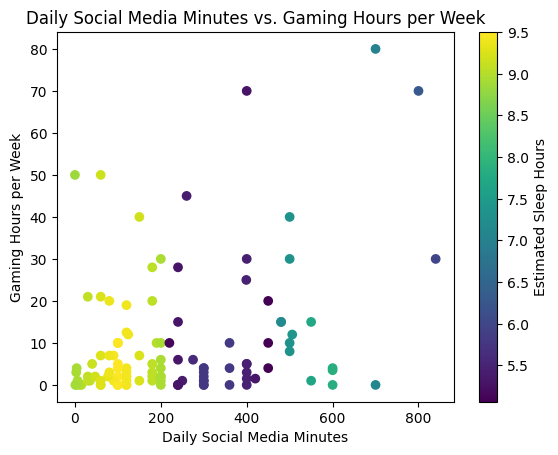

In [413]:
plt.scatter(df_cleaned['Daily_Social_Media_Minutes_clean'], df_cleaned['Gaming_hours_per_week_clean'], c=df_cleaned['estimated_sleep_hours'], cmap='viridis')
plt.xlabel('Daily Social Media Minutes')
plt.ylabel('Gaming Hours per Week')
plt.title('Daily Social Media Minutes vs. Gaming Hours per Week')
plt.colorbar(label='Estimated Sleep Hours')
plt.show()

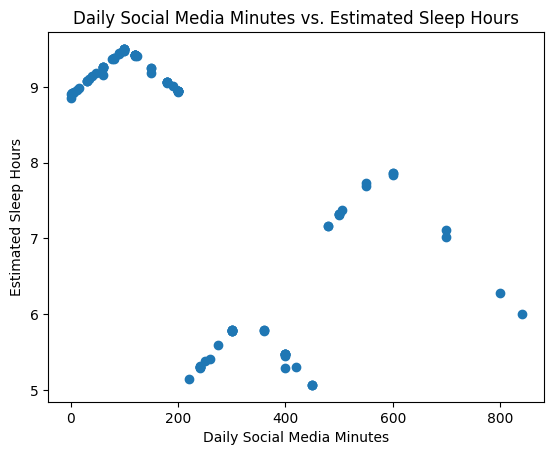

In [414]:
plt.scatter(df_cleaned['Daily_Social_Media_Minutes_clean'],df_cleaned['estimated_sleep_hours'])
plt.xlabel('Daily Social Media Minutes')
plt.ylabel('Estimated Sleep Hours')
plt.title('Daily Social Media Minutes vs. Estimated Sleep Hours')
plt.show()

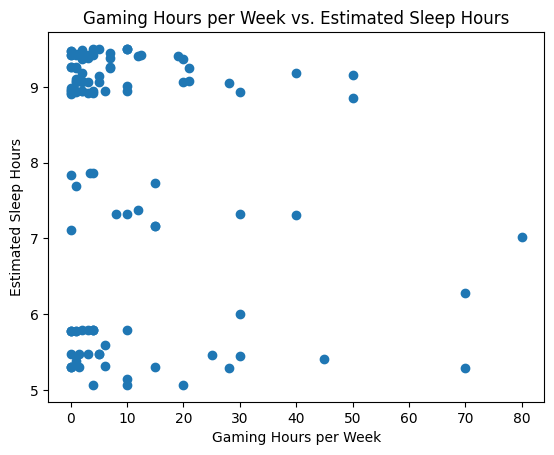

In [415]:
plt.scatter(df_cleaned['Gaming_hours_per_week_clean'],df_cleaned['estimated_sleep_hours'])
plt.xlabel('Gaming Hours per Week')
plt.ylabel('Estimated Sleep Hours')
plt.title('Gaming Hours per Week vs. Estimated Sleep Hours')
plt.show()

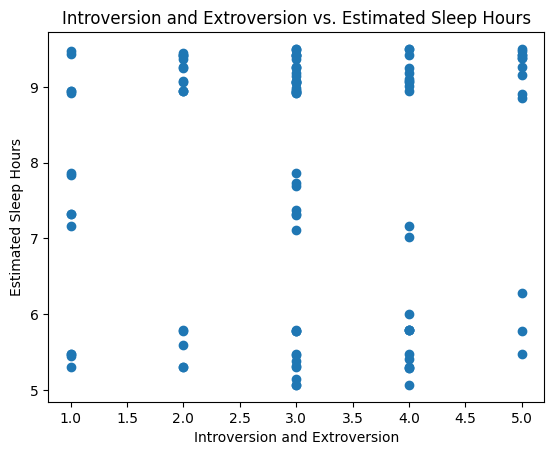

In [416]:
plt.scatter(df_cleaned['Introversion extraversion'],df_cleaned['estimated_sleep_hours'])
plt.xlabel('Introversion and Extroversion')
plt.ylabel('Estimated Sleep Hours')
plt.title('Introversion and Extroversion vs. Estimated Sleep Hours')
plt.show()

In [417]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

X_unlabeled = df_cleaned[['Daily_Social_Media_Minutes_clean', 'Gaming_hours_per_week_clean', 'Introversion extraversion']]
labels=df_cleaned['sleep_behavior_cluster']
sil_score = silhouette_score(X_unlabeled, labels)
db_score = davies_bouldin_score(X_unlabeled, labels)

print("Silhouette Score:", sil_score)
print("Davies-Bouldin Score:", db_score)


Silhouette Score: 0.5553574172321363
Davies-Bouldin Score: 0.5994235759153045
